# Consumer-focused Clustering of US Branded Food Products

#### There is a contradiction in the US where on one hand, consumers rely heavily on manufactured food products for their diet. On the other, they want to be in control of what they consume.
In my three years as an engineer in the food manufacturing industry I noticed a marked trend where ingredient lists and nutritional information are becoming increasingly complex. Advances in food science are continually creating new ways of manufacturing similar food products in ways that the traditional supermarket food categories aren’t enough to capture what the consumers look for. 
Take yogurts, which I chose as an example because it is a simple item that could be manufactured from as little as 2 ingredients, milk and bacterial culture. A preliminary exploration of the USDA Branded Food Products shows that the 2800 yogurts available in the shelfs are made of a combination of over 5000 different ingredients! And many of the most common ingredients are not part of the basic yogurt building blocks, including “natural flavors”, thickeners (gums) and preservatives.

 I plan to do cluster analysis of this data in order to generate food categories that are insightful to consumers. However, before doing so I think there are plenty of opportunities to do feature engineering and generate interesting visualizations from this data. For example, besides determining the composition of a food product, the position of the ingredient in the ingredient list indicates its weight% prevalence. Also, there are several ingredient categories that could be binned depending to generate insights into things such as preservatives, natural additives, artificial additives, etc.


## Data Source
The data source is the USDA Branded Food Products Database. This is public data source that was created as a public-private partnership in September 2016. However, their website does not offer a complete database export option, so I download the OpenFoodFacts.org database, which includes all of the records scrapped from the USDA Branded Food Product.

This is a great time to analyze this data because it is the first self-reported ingredient list database for US branded products and has not been extensively analyzed yet.

## Example: Yogurt Data Exploration
I chose yogurt as an example of category of food product that could benefit from analysis. Even though I plan to analyse the whole corpus in my actual project, exploring this specific category gives insight into the problem that I am trying to address. 

### Reading the data
I used Python's Pandas to read and manipulate the data downloaded from Open Food Facts.

In [74]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

path = os.getcwd() + '/openfoodfacts.csv'
food_db = pd.read_csv(path, sep = '\t', dtype = object)

Filter data by USDA Branded Food Products scrapped import

In [18]:
usda_bfp = food_db.loc[food_db['creator'] == 'usda-ndb-import']

Approximate yogurt-products filter

In [64]:
yogurts_w_salt = usda_bfp[usda_bfp['product_name'].str.contains('Yogurt', na = False)]
yogurts = yogurts_w_salt[~yogurts_w_salt['ingredients_text'].str.contains('salt', na = False)]

In [93]:
yogurts['ingredient_number'] = yogurts['ingredients_text'].str.split(', ').str.len()
stat = [min(yogurts['ingredient_number']), max(yogurts['ingredient_number']), np.mean(yogurts['ingredient_number'])]

### Plotting

In [50]:
ingredient_count = defaultdict(int)

for index, row in yogurts.iterrows():
    for ingredient in row['ingredients_text'].split(', '):
        ingredient_count[ingredient] += 1

df_count = pd.DataFrame.from_records([ingredient_count])

df_count['cultured milk'] = 0

for column in df_count:
    if re.match(r'Cultured.*milk|milk.*Cultured|milk|Milk', column):
        df_count['cultured milk'] += df_count[column][0]
    if re.match(r'natural.*flavors', column):
        df_count['natural flavor'] += df_count[column][0]
        df_count[column][0] = 0
df_count = df_count.sort_values(by = [0], axis=1, ascending = False)
sorted(ingredient_count.items(), key=lambda x: x[1], reverse = True);

First, lets take a look at the number of ingredients that it takes to make a yogurt

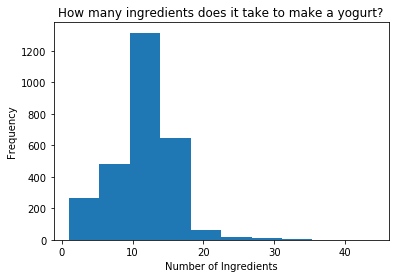

In [83]:
yogurts['ingredient_number'].plot.hist()
plt.ylabel('Frequency')
plt.xlabel('Number of Ingredients')
plt.title('How many ingredients does it take to make a yogurt?')
plt.show();

The plot shows that it takes from 1 to 40 ingredients to make a yogurt (and on average 12). So what are these ingredients and how often are they used?

Lets take a look at how many unique ingredients make up the over 2800 yogurts available in the shelfs of US supermarkets.

The plot below is a histogram of the top 50 ingredients in yogurts.

There are approximately 2804 branded yogurts for sale in the american market
There are approximately 5012 unique ingredients in these yogurts


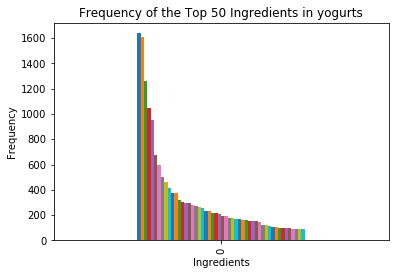

In [51]:
#Top 10 ingredients by frequency
print('There are approximately {0} branded yogurts for sale in the american market'.format(yogurts.shape[0]))
print('There are approximately {0} unique ingredients in these yogurts'.format(df_count.shape[1]))
df_count.iloc[:,range(50)].plot(kind='bar', legend = None)
plt.ylabel('Frequency')
plt.xlabel('Ingredients')
plt.title('Frequency of the Top 50 Ingredients in yogurts')
plt.show();

The plot above give us an idea of the variety of ingredients that make up yogurts. There are some ingredients that are the most common but there are also a number of ingredients that show up regularly in yogurts.

Lets now zoom into this plot and look at the top 10 most common ingredients:

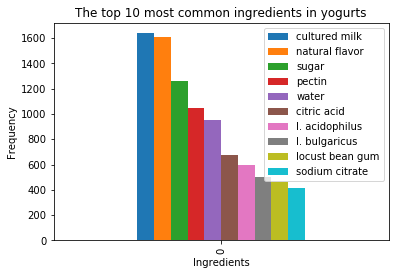

In [52]:
df_count_top_10 = df_count.iloc[:,range(10)]
df_count_top_10.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Ingredients')
plt.title('The top 10 most common ingredients in yogurts')
plt.show();

Going to the supermarket category of yogurts you would think that cultured milk, the very definition of yogurt, would be what you are buying correct? However, this plot shows that of the 2800 yogurts available in supermarket shelfs, only about 1600 contain cultured milk. In fact the second most common ingredient "Natural Flavors" is a close second, followed by additives such as pectin (for texture), citric acid (acidity control) and sodium citrate (preservative).

This highlights the importance of taking a closer look of what we are eating.